# Data Cleaning: 
Since this dataset came from Kaggle, there was not a lot of data cleaning we needed to do. However, we did take a few steps to make the data cleaner and easier to manage. 

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

This is the first few rows of the original dataset we had.

In [54]:
data= pd.read_csv('data.csv')
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


**Step 1:** 
Since we want to analyze the relationship between song attributes and popularity, we dropped any columns that we did not need in order to do our analysis in order to make the dataset more manageable. These columns included: 
- alphanumeric ‘id’: the spotify issued ID for a track as all the songs already are indexed 
- string ‘name’: name of the track 
- date ‘release date’: release date of the track (format yyyy or yyyy-mm-dd or yyyy-dd-mm) as we already have another field called year which has the release year of the song

**Step 2:**
We dropped any NaN or null values. 



In [55]:
data= data.drop(['id','name', 'release_date'], axis=1)
data= data.dropna()
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,0,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,0,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,0,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,0,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928


**Step 3:**
We renamed some of the columns to make them easier to understand both by us (who are not music experts) and users. These columns include:
- "tempo": "tempo_in_bpm" 
- "valence": "music_positivity" 
- "liveness": "live_audience_presence"
- "mode": "chord_modality"
- "key": "music_note_key"

**Step 4:**
We also reordered the columns to have the popularity and year in the beginning as these are the factors that we are mainly analyzing by. We also put the artist as the last column because the artist is only needed for filtering purposes when we are analyzing the induvidual artist. 

The data.head() below is the completely cleaned version of the data we used. 

In [56]:
data.rename(columns={"tempo": "tempo_in_bpm", "valence": "music_positivity", "liveness": "live_audience_presence", "mode": "chord_modality", "key": "music_note_key"}, inplace= True)
#found the list of columns by doing: 
#cols = list(df.columns.values)
#and then just reordered the list
data = data[['year', 'popularity','acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'music_note_key', 'live_audience_presence', 'loudness', 'chord_modality', 'speechiness', 'tempo_in_bpm', 'music_positivity', 'artists']]
data.head()

,year,popularity,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,music_note_key,live_audience_presence,loudness,chord_modality,speechiness,tempo_in_bpm,music_positivity,artists
0,1928,0,0.995,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,0.0506,118.469,0.7790,['Carl Woitschach']
1,1928,0,0.994,0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,0.0462,83.972,0.0767,"['Robert Schumann', 'Vladimir Horowitz']"
2,1928,0,0.604,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,0.9290,107.177,0.8800,['Seweryn Goszczyński']
3,1928,0,0.995,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,0.0926,108.003,0.7200,['Francisco Canaro']
4,1928,1,0.990,0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,0.0424,62.149,0.0693,"['Frédéric Chopin', 'Vladimir Horowitz']"


We write our dataset out to a new csv file.

In [57]:
compression_opts = dict(method='zip',
                        archive_name='data_clean.csv')  
data.to_csv('data_clean.zip', index=False,
          compression=compression_opts)  

# Other Appendices

This includes some of our analyses which were not particularly interesting and didn't make it to our final report as our result.

### Summary Data Description of Subset of Songs from 1920-1930

In [58]:
data_1920s= data.loc[data['year']>1920]
data_1920s_1930s= data_1920s.loc[data_1920s['year']<=1930]
data_1920s_1930s.head()

,year,popularity,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,music_note_key,live_audience_presence,loudness,chord_modality,speechiness,tempo_in_bpm,music_positivity,artists
0,1928,0,0.995,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,0.0506,118.469,0.7790,['Carl Woitschach']
1,1928,0,0.994,0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,0.0462,83.972,0.0767,"['Robert Schumann', 'Vladimir Horowitz']"
2,1928,0,0.604,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,0.9290,107.177,0.8800,['Seweryn Goszczyński']
3,1928,0,0.995,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,0.0926,108.003,0.7200,['Francisco Canaro']
4,1928,1,0.990,0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,0.0424,62.149,0.0693,"['Frédéric Chopin', 'Vladimir Horowitz']"


In [59]:
print("Number of songs in 1920s-1930s decade: ",len(data_1920s_1930s))

Number of songs in 1920s-1930s decade:  6260


#### Spotify's Popularity Rankings for Songs in the 1920s-1930s

Text(0.5, 1.0, 'Distribution of Songs from the 1920s-1930s by Popularity')

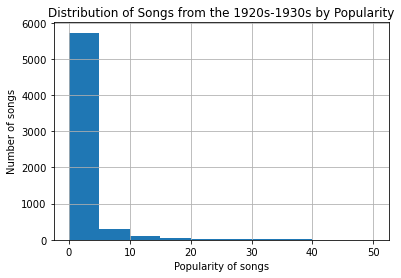

In [60]:
data_1920s_1930s.hist(column='popularity')
plt.xlabel('Popularity of songs')
plt.ylabel('Number of songs')
plt.title("Distribution of Songs from the 1920s-1930s by Popularity")

#### Popularity vs loudness for songs from 1920-1930

Covariance of Popularity to Loudness: 1.28
Correlation of Popularity to Loudness: 0.06


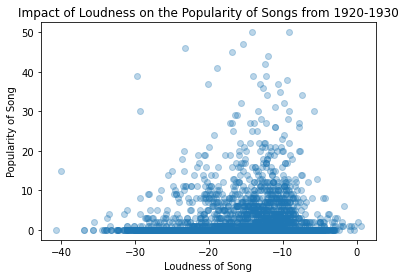

In [61]:
plt.scatter(data_1920s_1930s['loudness'], data_1920s_1930s['popularity'], alpha=0.3)
plt.ylabel("Popularity of Song")
plt.xlabel("Loudness of Song")
plt.title("Impact of Loudness on the Popularity of Songs from 1920-1930")

covariance_loud= data_1920s_1930s['loudness'].cov(data_1920s_1930s['popularity'])
correlation_loud= data_1920s_1930s['loudness'].corr(data_1920s_1930s['popularity'], method= 'pearson')
print("Covariance of Popularity to Loudness: {:.2f}".format(covariance_loud))
print("Correlation of Popularity to Loudness: {:.2f}".format(correlation_loud))

#### Popularity vs acousticness for songs from 1920-1930

Covariance of Popularity to Acousticness: 0.10
Correlation of Popularity to Acousticness: 0.08


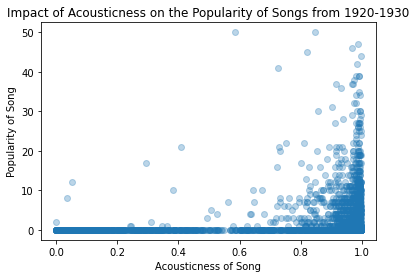

In [62]:
plt.scatter(data_1920s_1930s['acousticness'], data_1920s_1930s['popularity'], alpha=0.3)
plt.ylabel("Popularity of Song")
plt.xlabel("Acousticness of Song")
plt.title("Impact of Acousticness on the Popularity of Songs from 1920-1930")

covariance_acoust= data_1920s_1930s['acousticness'].cov(data_1920s_1930s['popularity'])
correlation_acoust= data_1920s_1930s['acousticness'].corr(data_1920s_1930s['popularity'], method= 'pearson')
print("Covariance of Popularity to Acousticness: {:.2f}".format(covariance_acoust))
print("Correlation of Popularity to Acousticness: {:.2f}".format(correlation_acoust))

Correlation between popularity and loudness is positive. There is a weak positive linear relationship between the two variables, that suggests increase in loudness is very weakly correlated with increase in popularity for songs released in 1920-1930 decade.

Correlation between popularity and acousticness is positive. There is a weak positive linear relationship between the two variables, that suggests increase in acousticness is very weakly correlated with increase in popularity for songs released in 1920-1930 decade.


#### Popularity vs instrumentalness for Songs from 1960-1970

In [63]:
data_1960s= data.loc[data['year']>1960]
data_1960s_1970s= data_1960s.loc[data_1960s['year']<=1970]
data_1960s_1970s.head()

,year,popularity,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,music_note_key,live_audience_presence,loudness,chord_modality,speechiness,tempo_in_bpm,music_positivity,artists
2154,1961,15,0.729,0.497,377600,0.263,0,0.0978,5,0.146,-18.366,1,0.0351,109.284,0.414,['John Coltrane']
2155,1961,13,0.491,0.668,204627,0.453,0,0.7740,2,0.565,-16.417,1,0.0535,97.732,0.354,['Ahmad Jamal Trio']
2156,1961,13,0.961,0.275,187933,0.110,0,0.8880,7,0.108,-20.325,1,0.0356,166.733,0.466,['Don Shirley']
2157,1961,16,0.954,0.337,447453,0.130,0,0.6980,3,0.320,-15.557,1,0.0403,58.813,0.200,['Dexter Gordon']
2158,1961,10,0.789,0.466,247133,0.205,0,0.0000,5,0.099,-12.981,1,0.0315,84.211,0.502,['Annette Funicello']


Covariance of Popularity to Instrumentalness: -0.37
Correlation of Popularity to Instrumentalness: -0.10


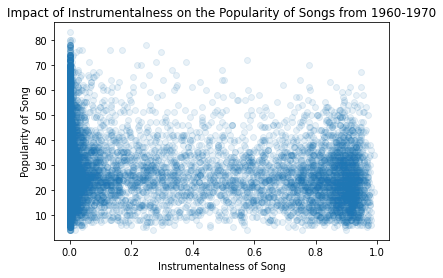

In [64]:
plt.scatter(data_1960s_1970s['instrumentalness'], data_1960s_1970s['popularity'], alpha=0.1)
plt.ylabel("Popularity of Song")
plt.xlabel("Instrumentalness of Song")
plt.title("Impact of Instrumentalness on the Popularity of Songs from 1960-1970")

covariance_inst= data_1960s_1970s['instrumentalness'].cov(data_1960s_1970s['popularity'])
correlation_inst= data_1960s_1970s['instrumentalness'].corr(data_1960s_1970s['popularity'], method= 'pearson')
print("Covariance of Popularity to Instrumentalness: {:.2f}".format(covariance_inst))
print("Correlation of Popularity to Instrumentalness: {:.2f}".format(correlation_inst))

Correlation between popularity and instrumentalness is negative. There is a weak negative linear relationship between the two variables, that suggests increase in instrumentalness is very weakly correlated with decrease in popularity for songs released in 1960-1970 decade.

#### Popularity vs Live Audience Presence for Songs from 1960-1970

Covariance of Popularity to Live Audience Presence: -0.13
Correlation of Popularity to Live Audience Presence: -0.06


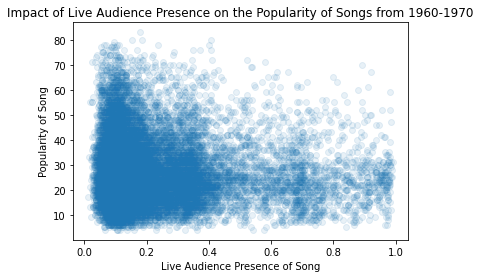

In [65]:
plt.scatter(data_1960s_1970s['live_audience_presence'], data_1960s_1970s['popularity'], alpha=0.1)
plt.ylabel("Popularity of Song")
plt.xlabel("Live Audience Presence of Song")
plt.title("Impact of Live Audience Presence on the Popularity of Songs from 1960-1970")

covariance_lav= data_1960s_1970s['live_audience_presence'].cov(data_1960s_1970s['popularity'])
correlation_lav= data_1960s_1970s['live_audience_presence'].corr(data_1960s_1970s['popularity'], method= 'pearson')
print("Covariance of Popularity to Live Audience Presence: {:.2f}".format(covariance_lav))
print("Correlation of Popularity to Live Audience Presence: {:.2f}".format(correlation_lav))


Correlation between popularity and live_audience_presence is negative. There is a weak negative linear relationship between the two variables, that suggests inrease in instrumentalness is very weakly correlated with decrease in popularity for songs released in 1960-1970 decade.

Instrumentalness has a lower correlation value compared to live_audience_presence in the 1960-1970 decade.
